In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize


In [2]:
def deltat(time,ch1,ch2):
    half1= max(ch1)/2
    half2= max(ch2)/2
    i=0
    while ch1[i]<half1:
        i=i+1
    j=0
    while ch2[j]<half2:
        j=j+1
    t1= time[i]
    t2= time[j]
    dt= time[j]-time[i]
    return dt, t1 ,t2

def tot(time, ch):
    half= max(ch)/2
    i=0
    while ch[i]<half:
        i=i+1
    j=i+30
    while ch[j]>half:
        j=j+1
    tott= time[j]-time[i]
    return tott

In [3]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/Scans_MPW2/scan_L2_2V_A2_8V/*")

a= sorted(a)

print(a[0])

/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/Scans_MPW2/scan_L2_2V_A2_8V/20221103-092015_0.h5


In [4]:
temp=[]
for i in range(3):
    f= h5py.File(a[i])
    temp.append(f)

In [5]:
temp[1].keys()

<KeysViewHDF5 ['Time', 'Voltage_CHAN1', 'Voltage_CHAN2']>

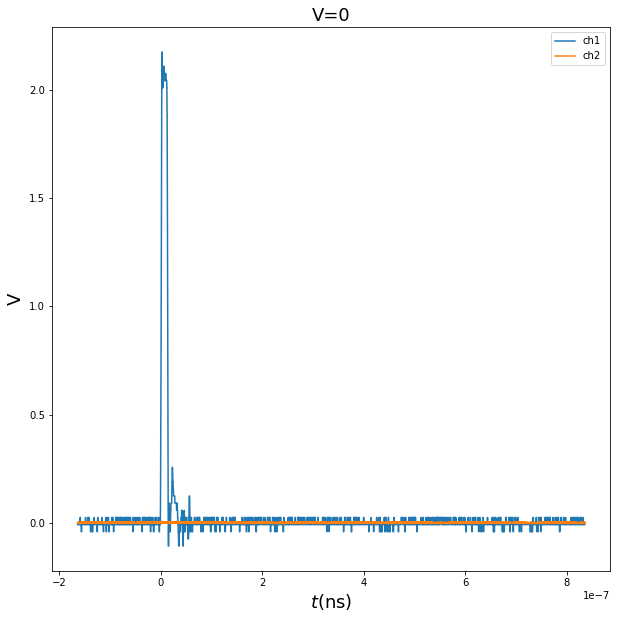

In [6]:
ch1= temp[1]['Voltage_CHAN1']
ch1= np.array(ch1)
ch2= temp[1]["Voltage_CHAN2"]
ch2= np.array(ch2)


time=temp[1]["Time"]

fig = plt.figure(figsize=(10,10))
plt.plot(time[0:16001],ch1[0:16001], label="ch1")
plt.plot(time[0:16001],ch2[0:16001], label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=0",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()

In [7]:
max(ch2)

0.00661482

In [8]:
%%time

pixelnames=[]
temp=[]
for i in range(len(a)):
    if i==0:
        temp.append(a[i])
    elif a[i]==a[-1]:
        temp.append(a[i])
        pixelnames.append(temp)
    elif a[i][99:105]==a[i-1][99:105]:
        temp.append(a[i])
    else:
        pixelnames.append(temp)
        temp=[]
        temp.append(a[i])

CPU times: user 35.1 ms, sys: 337 µs, total: 35.5 ms
Wall time: 35.2 ms


In [9]:
print(a[1])

/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/Scans_MPW2/scan_L2_2V_A2_8V/20221103-092015_1.h5


In [10]:
%%time
pixelsdt=[]
pixelstot=[]
empty=[]

for i in range(len(pixelnames)):
    temp2=[]
    temp3=[]
    empty1=[]
    for j in range(len(pixelnames[i])):
        temp1=h5py.File(pixelnames[i][j])
        temps=temp1
        ch1= temps['Voltage_CHAN1']
        ch1= np.array(ch1)
        ch2= temps["Voltage_CHAN2"]
        ch2= np.array(ch2)
        time=temps["Time"]
        if max(ch2)<0.008:
            empty1.append(max(ch2))
        else:
            dt,t2,t3 =deltat(time,ch1,ch2)
            temp2.append(dt)
            temp3.append(tot(time,ch2))
        temp1.close()
    pixelsdt.append(temp2)
    pixelstot.append(temp3)
    empty.append(empty1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
CPU times: user 3min 15s, sys: 14.5 s, total: 3min 30s
Wall time: 4min 52s


In [12]:
k=0
for i in range(len(empty)):
    if (len(pixelnames[i])-len(empty[i]))>0:
        k=k+1
print(k)

13


In [23]:
np.shape(pixelnames)

/home/pixel/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(64,)

In [83]:
hits=[]
realhits=[]

pixtot=[]
pixdt=[]
pixmean=[]

for i in range(len(pixelnames)):
    realhits.append(len(pixelstot[i]))
    hits.append(len(pixelnames[i]))
    if len(pixelstot)==0:
        pixtot.append(0)
        pixdt.append(0)
    else:
        pixtot.append(np.mean(pixelstot[i]))
        pixdt.append(np.mean(pixelsdt[i]))


print(hits)

[1178, 1182, 1182, 1186, 1186, 1184, 1182, 1183, 1186, 1184, 1184, 1149, 1185, 1185, 1186, 1183, 1184, 1185, 1185, 1185, 1184, 1184, 1185, 1184, 1186, 1186, 1186, 1184, 1184, 1184, 1186, 1184, 1185, 1184, 1186, 1183, 1185, 1183, 1185, 1184, 1186, 1184, 1185, 1183, 1184, 1184, 1184, 1183, 1184, 1181, 1184, 1182, 1185, 1184, 1186, 1186, 1183, 1186, 1184, 1188, 1185, 1187, 1187, 1186]


In [95]:

totmap= np.reshape(pixtot,(8,8))


per=[]

for i in range(len(hits)):
    per.append((realhits[i]/hits[i])*100)
    
permap=np.reshape(per,(8,8))

np.mean(hits)

1183.859375

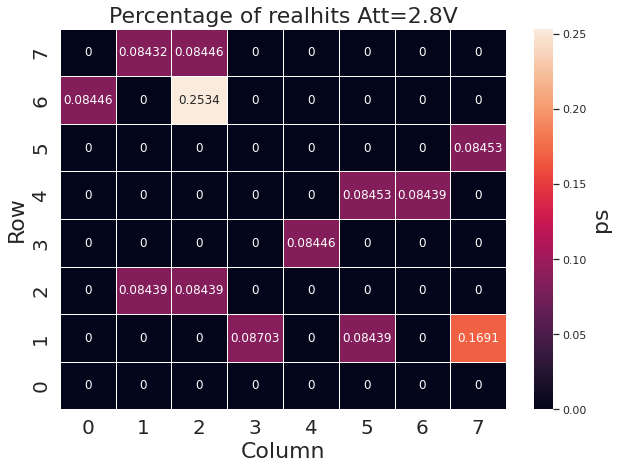

In [97]:
plt.figure(figsize = (10,7))
plt.title('Percentage of realhits Att=2.8V',fontsize=22)
ax=sns.heatmap(permap, linewidth=0.5,annot=True, fmt='.4g')
ax.collections[0].colorbar.set_label("ps",fontsize=22)
plt.xlabel("Column",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Row',fontsize=22)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
plt.title('Time over Threshold map Att=2.2V',fontsize=22)
ax=sns.heatmap(totmap, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [ ]:
totmap[0,3]
contot=[]
conres=[]
for i in range(4):
    for j in range(8):
        contot.append(totmap[j,i])
        conres.append(sigmap[j,i])

switchtot= []
switchres=[]
for i in range(4,8):
    for j in range(8):
        switchtot.append(totmap[j,i])
        switchres.append(sigmap[j,i])

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(switchtot,switchres, label="Switched pixels")
plt.scatter(contot,conres, label="Continuous pixels")

plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Time resolution(ns)",fontsize=18)
plt.title("Time resolution vs ToT, Att=2.2V",fontsize=18)
plt.xlabel("ToT(ns)",fontsize=18)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [ ]:
timeres= conres

for i in range(len(switchres)):
    timeres.append(switchres[i])
    
    
totlist= contot

for i in range(len(switchtot)):
    totlist.append(switchtot[i])

In [ ]:
mean= np.mean(timeres)
std= np.std(timeres)
amount= len(timeres)
fig = plt.figure(figsize=(10,10))
plt.hist(timeres, bins=50, alpha=0.6, color='b')
plt.xlabel("$\sigma_t$(ps)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(1250,22),fontsize=14)
plt.annotate("std.dev.={:.1f}".format(std),xy=(1250,21),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)





plt.show()

In [ ]:
mean= np.mean(timeres)
std= np.std(timeres)
amount= len(timeres)
fig = plt.figure(figsize=(10,10))
plt.hist(timeres, bins=50, alpha=0.6, color='b',range=(200,400))
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(1250,22),fontsize=14)
plt.annotate("std={:.1f}".format(std),xy=(1250,21),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)





plt.show()



In [ ]:
new=[]

for i in range(len(timeres)):
    if timeres[i]<400:
        new.append(timeres[i])
        
    

In [ ]:
mean= np.mean(new)
std= np.std(new)
amount= len(new)
fig = plt.figure(figsize=(10,10))
plt.hist(new, bins=50, alpha=0.6, color='b',range=(200,400))
plt.xlabel("$\sigma_t$(ps)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(350,5),fontsize=14)
plt.annotate("std={:.1f}".format(std),xy=(350,4.75),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(350,4.5),fontsize=14)





plt.show()

In [ ]:
np.std(new)

In [ ]:
def q(tot):
    return (tot-36.10)/0.0084

In [ ]:
charge=[]
for i in range(len(tot2)):
    ch= q(tot2[i])
    charge.append(ch)
    
chargemap= np.reshape(charge,(8,8))


In [ ]:
plt.figure(figsize = (10,7))
plt.title('Injected Charges in Electrons Map',fontsize=22)
ax=sns.heatmap(chargemap, linewidth=0.5,annot=True, fmt='.2g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

In [ ]:
tot2[-1]

In [ ]:
mean= np.mean(totlist)
std= np.std(totlist)
amount= len(totlist)
fig = plt.figure(figsize=(10,10))
plt.hist(totlist, bins=50, alpha=0.6, color='b')
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time over threshold",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(175,13),fontsize=14)
plt.annotate("std.dev={:.1f}".format(std),xy=(175,12.5),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(175,12),fontsize=14)





plt.show()

In [ ]:
test=pixelsdt[10]
np.std(test)*1000
amounts= len(pixelsdt[10])

In [ ]:
def Gaussian(x,a,b,c):
    return a * exp(-(x - b)**2.0 / (2 * c**2))

In [ ]:
det00=[]
for i in range(len(test)):
    det00.append(test[i]-np.mean(test))

In [ ]:
nbins=60
n,bins,patches = plt.hist(det00,bins=nbins)

fig = plt.figure(figsize=(10,10))

bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8

for i in range(len(n)):
    if n[i] ==1e-8:
        n[i]= (n[i-1]+n[i+1])/2






popt, pcov = optimize.curve_fit(Gaussian,x,n) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)


std=popt[2]*1000
amount=nbins
# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)
plt.bar(x,n, width=bin_size)
plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian')

chi_square_test_statistic1 = 0
for i in range(len(n)):
    chi_square_test_statistic1 = chi_square_test_statistic1 + \
        (np.square(n[i]-y_gauss[i]))/y_gauss[i]

chi2=chi_square_test_statistic1
plt.annotate("std.dev={:.1f}ps".format(std),xy=(0.5,110),fontsize=14)
plt.annotate("number of bins: {}".format(amount),xy=(0.5,105),fontsize=14)
plt.annotate("number of samples: {}".format(amounts),xy=(0.5,100),fontsize=14)
plt.annotate("$\chi^2$ ={:.2f}".format(chi2),xy=(0.5,95),fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Time(ns)",fontsize=18)
plt.ylabel("# of samples",fontsize=18)

plt.show()
print(perr_curvefit[2]*1000)